# **HOTEL BOOKING DEMAND**

Dataset from https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand/data

This dataset introduces two datasets containing hotel demand data: one for a resort hotel (H1) and the other for a city hotel (H2). Both datasets comprise 31 variables, documenting 40,060 observations for H1 and 79,330 observations for H2. Each observation represents a hotel booking made between July 1, 2015, and August 31, 2017, encompassing both arrivals and cancellations. Personal identifying information related to hotels and customers has been removed for privacy reasons.

*Reservation Information:*
* Lead Time: Number of days that elapsed between the entering date of the booking into the PMS and the arrival date
* Arrival Date Year: Year of arrival date
* Arrival Date Month: Month of arrival date
* Arrival Date Week Number: Week number of the arrival date
* Arrival Date Day of Month: Day of the month of the arrival date
* Reservation Status: Reservation last status, assuming one of three categories:
** Canceled: booking was canceled by the customer;
** Check-Out: customer has checked in but already departed;
** No-Show: customer did not check-in and did inform the hotel of the reason why
* Reservation Status Date: Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

*Guest Stay Information:*
* Stays in Weekend Nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* Stays in Week Nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* Meal: Type of meal booked. Categories are presented in standard hospitality meal packages:
** Undefined/SC: no meal package;
** BB: Bed & Breakfast;
** HB: Half board (breakfast and one other meal / usually dinner);
** FB: Full board (breakfast, lunch and dinner)



*Booking Details:*
* Is Canceled: Value indicating if the booking was canceled (1) or not (0)
* Adults: Number of adults
* Children: Number of children
* Babies: Number of babies
* Market Segment: Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”
* Is Repeat Guest: Value indicating if the booking name was from a repeated guest (1) or not (0)
* Previous Cancellations: Number of previous bookings that were cancelled by the customer prior to the current booking
* Previous Booking Not Canceled: Number of previous bookings not cancelled by the customer prior to the current booking
* Booking Changes: Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation
* Deposit Type: Indication on if the customer made a deposit to guarantee the booking. This variable can assume three categories:
** No Deposit: no deposit was made;
** Non Refund: a deposit was made in the value of the total stay cost;
** Refundable: a deposit was made with a value under the total cost of stay.
* Company: ID of the company/entity that made the booking or responsible for paying the booking. ID is presented instead of designation for anonymity reasons
* Day In Waiting List: Number of days the booking was in the waiting list before it was confirmed to the customer
* Customer Type: Type of booking, assuming one of four categories:
** Contract: when the booking has an allotment or other type of contract associated to it;
** Group: when the booking is associated to a group;
** Transient: when the booking is not part of a group or contract, and is not associated to other transient booking;
** Transient-party: when the booking is transient, but is associated to at least other transient booking
* Distribution Channel: Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”
* Total of Special Requests: Number of special requests made by the customer (e.g. twin bed or high floor)

*Room Information:*
* Reserved Room Type: Code of room type reserved. Code is presented instead of designation for anonymity reasons
* Assigned Room Type: Code for the type of room assigned to the booking. Sometimes the assigned room type differs from the reserved room type due to hotel operation reasons (e.g. overbooking) or by customer request. Code is presented instead of designation for anonymity reasons

*Financial Information:*
* ADR (Average Daily Rate): Average Daily Rate.
* Required Car Parking Spaces: Number of car parking spaces required by the customer

*Agency Information:*
* Agent: 	ID of the travel agency that made the booking

*Geographic Information:*
* Country: Country of origin.


In [1]:
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None

In [2]:
# read csv and create a dataframe
# !unzip hotel_b.zip
hb_df = pd.read_csv('hotel_b/hotel_bookings.csv')

# **Exploratory Data Analysis**

In [3]:
hb_df.info()          # show for each column non-null values and its type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
hb_df.head()        # show firsts 5 rows for each column and theirs values

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
hb_df.tail()        # show lasts 5 rows for each column and theirs values

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [6]:
hb_df.describe()      # show the count of total values, mean, standard deviation, min and max value and percentage at 25%, 50%, 75%

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [7]:
hb_df.shape

(119390, 32)

# **Cleaning up the dataset**

I explore the data to understand which ones I can use and how to modify them if necessary

In [8]:
# hotel: Count the occurrences of unique values
hotel_counts = hb_df['hotel'].value_counts()
print("\nHotel counts:")
print(hotel_counts)


Hotel counts:
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64


In [9]:
# arrival_date_month: Count the occurrences of unique values
arrival_date_month_counts = hb_df['arrival_date_month'].value_counts()
print("\nArrival date Month counts:")
print(arrival_date_month_counts)


Arrival date Month counts:
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64


In [10]:
# children: Count the occurrences of unique values
children_counts = hb_df['children'].value_counts()
print("\nChildren counts:")
print(children_counts)


Children counts:
0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64


In [11]:
# meal: Count the occurrences of unique values
meal_counts = hb_df['meal'].value_counts()
print("\nMeal counts:")
print(meal_counts)


Meal counts:
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64


In [12]:
# market_segment: Count the occurrences of unique values
market_segment_counts = hb_df['market_segment'].value_counts()
print("\nMarket segment counts:")
print(market_segment_counts)


Market segment counts:
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64


In [13]:
# distribution_channel: Count the occurrences of unique values
distribution_channel_counts = hb_df['distribution_channel'].value_counts()
print("\nDistribution Channel counts:")
print(distribution_channel_counts)


Distribution Channel counts:
TA/TO        97870
Direct       14645
Corporate     6677
GDS            193
Undefined        5
Name: distribution_channel, dtype: int64


In [14]:
# deposit_type: Count the occurrences of unique values
deposit_type_counts = hb_df['deposit_type'].value_counts()
print("\nDeposit type counts:")
print(deposit_type_counts)


Deposit type counts:
No Deposit    104641
Non Refund     14587
Refundable       162
Name: deposit_type, dtype: int64


In [15]:
# agent: Count the occurrences of unique values
agent_counts = hb_df['agent'].value_counts()
print("\nAgent counts:")
print(agent_counts)


Agent counts:
9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
289.0        1
432.0        1
265.0        1
93.0         1
304.0        1
Name: agent, Length: 333, dtype: int64


In [16]:
# company: Count the occurrences of unique values
company_counts = hb_df['company'].value_counts()
print("\nCompany counts:")
print(company_counts)


Company counts:
40.0     927
223.0    784
67.0     267
45.0     250
153.0    215
        ... 
104.0      1
531.0      1
160.0      1
413.0      1
386.0      1
Name: company, Length: 352, dtype: int64


In [17]:
# customer_type: Count the occurrences of unique values
customer_type_counts = hb_df['customer_type'].value_counts()
print("\nCustomer type counts:")
print(customer_type_counts)


Customer type counts:
Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: customer_type, dtype: int64


In [18]:
# reservation_status: Count the occurrences of unique values
reservation_status_counts = hb_df['reservation_status'].value_counts()
print("\nReservation Status counts:")
print(reservation_status_counts)


Reservation Status counts:
Check-Out    75166
Canceled     43017
No-Show       1207
Name: reservation_status, dtype: int64


In [19]:
# reservation_status_date: Count the occurrences of unique values
reservation_status_date_counts = hb_df['reservation_status_date'].value_counts()
print("\nReservation Status Date counts:")
print(reservation_status_date_counts)


Reservation Status Date counts:
2015-10-21    1461
2015-07-06     805
2016-11-25     790
2015-01-01     763
2016-01-18     625
              ... 
2015-02-27       1
2015-04-25       1
2015-03-11       1
2015-06-14       1
2015-02-12       1
Name: reservation_status_date, Length: 926, dtype: int64


Some columns are unnecessary: I drop them

In [20]:
# I drop the columns about lead_time and days_in_waiting_list,
# since they won't be the focus of this project
# I leave it out because I'm not interested in the analysis I want to conduct

hb_df.drop(['lead_time','days_in_waiting_list', 'required_car_parking_spaces'],
                    axis=1, inplace = True)
hb_df.columns

Index(['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'meal', 'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'customer_type', 'adr', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [21]:
# I leave out the arrival_date_week value because there are year date, month date
# and day date and these are sufficient to analyze the trend during the year

hb_df.drop(['arrival_date_week_number'], axis=1, inplace = True)
hb_df.columns

Index(['hotel', 'is_canceled', 'arrival_date_year', 'arrival_date_month',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'customer_type', 'adr', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [22]:
hb_df.shape

(119390, 28)

## Null values

In [23]:
# Find exactly how many missing values I have in each column

hb_df.isnull().sum()

hotel                                  0
is_canceled                            0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
customer_type                          0
adr             

In [24]:
# Handle missing values
hb_df['children'].fillna(0, inplace = True)
hb_df['country'].fillna('Unknown', inplace = True)
hb_df['agent'].fillna(0, inplace = True)
hb_df['company'].fillna(0, inplace = True)

# Convert some values to facilitate analysis
hb_df['hotel'] = hb_df['hotel'].map({'City Hotel': 'H1', 'Resort Hotel':'H2'})

hb_df['arrival_date_month'] = pd.to_datetime(hb_df['arrival_date_month'], format='%B').dt.month

hb_df['meal'] = hb_df['meal'].map({'BB':1, 'HB':2, 'SC':0, 'Undefined':0, 'FB':3})

# hb_df['market_segment'] = hb_df['market_segment'].map({
#        'Undefined':0, 'Offline TA/TO': 1, 'Online TA':2, 'Groups':3, 'Direct':4,
#        'Corporate':5, 'Complementary':6, 'Aviation':7})

hb_df['reserved_room_type'] = hb_df['reserved_room_type'].map({
    'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'H':7, 'L':10, 'P':11 })
hb_df['assigned_room_type'] = hb_df['assigned_room_type'].map({
    'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6, 'H':7, 'I':8, 'K':9,'L':10, 'P':11})

hb_df['reservation_status'] = hb_df['reservation_status'].map({
        'No-Show':-1, 'Canceled':0, 'Check-Out':1})

hb_df.to_csv("cleaned_hb_dataset.csv", index = False)    # new csv with cleaned data


In [25]:
# Find exactly how many missing values I have in each column

hb_df.isnull().sum()

hotel                             0
is_canceled                       0
arrival_date_year                 0
arrival_date_month                0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
customer_type                     0
adr                               0
total_of_special_requests         0
reservation_status                0
reservation_status_date     

 # **Plots**

In [26]:
import matplotlib.pyplot as plt
import seaborn as sb

In [27]:
# Count the occurrences of unique values in the 'arrival_date_month' column
arrival_month_counts = hb_df['arrival_date_month'].value_counts()
print("\nArrival date month counts:")
print(arrival_month_counts)


Arrival date month counts:
8     13877
7     12661
5     11791
10    11160
4     11089
6     10939
9     10508
3      9794
2      8068
11     6794
12     6780
1      5929
Name: arrival_date_month, dtype: int64


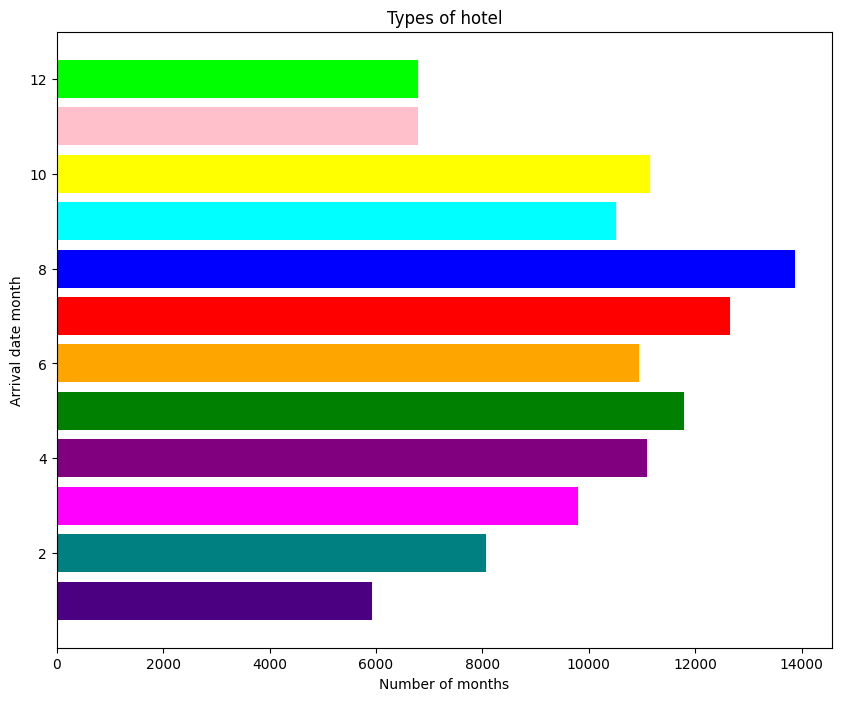

In [28]:
plt.figure(figsize = (10, 8))
plt.title('Types of hotel')
# I use horizontal bars
plt.barh(arrival_month_counts.index, arrival_month_counts.values,
         label = arrival_month_counts.index,
         color = ['Blue','Red','Green','Yellow','Purple','Orange','Cyan','Magenta','Teal','Pink','Lime','Indigo'])
plt.xlabel('Number of months')
plt.ylabel('Arrival date month')
plt.show()